# Mendenhall's Characteristic Curve (1887): Early Stylometrics

In 1887 the polymath T. C. Mendenhall published an article in Science titled, "The Characteristic Curves of Composition" which is both one of the earliest examples of quantitative stylistics but also one of the first studies to present text visualizations based on the (manual) count of words. Mendenhall thought that different authors would have distinctive curves of word length frequencies which could help with authorship attribution. 

Here you can see an example of the characteristic curve of _Oliver Twist_. Mendenhall took the first 1000 words, counted the length in characters of these 1000 words and then graphed the number of words of each length. Thus one can see that there is just under 50 words of one letter length in the first one thousand words.

![Mendhall Characteristic Curve](data/Mendenhall-CharacteristicCurve/OliverTwist-CharacteristicCurve.png)

Mendenhall thought this method of analysis would help with the "identification or discrimination of authorship" or authorship attribution as we call it today.

## Acquiring the Text

We'll begin by fetching the edition of [Oliver Twist](http://www.gutenberg.org/cache/epub/730/pg730.txt) that's available from the [Gutenberg Project](http://en.wikipedia.org/wiki/Project_Gutenberg). It's always worth noting that other editions are available and may be preferable for various reasons, but the Gutenberg edition has the benefit of convenience and longevity.

Fetching a URL can be very quick and easy in Python, but we'll take a detour to first check if there's a local copy of the text file – this may help avoid some problems of connectivity and access management.

In [1]:
import os, urllib.request

# get the text from a filename (if it exists) or fetch the contents (and cache it for next time)
def get_text_local_or_url(filename, url):
    
    # do we have a local copy? if so read it in and return it
    if os.path.exists(filename):
        with open(filename) as f:
            return f.read()
    
    # if not, fetch the URL contents and then write it out for next time
    else:
        string = urllib.request.urlopen(url).read().decode()
        with open(filename, "w") as f:
            f.write(string)
        return string

So now we're ready to make a call to fetch the text.

In [2]:
oliverTwistAllString = get_text_local_or_url("data/Mendenhall-CharacteristicCurve/OliverTwist.txt",
    "http://www.gutenberg.org/cache/epub/730/pg730.txt").strip()

# show a snippet
print(oliverTwistAllString[:50], "[...]", oliverTwistAllString[-50:])

﻿The Project Gutenberg EBook of Oliver Twist, by C [...]  to our email newsletter to hear about new eBooks.


The Gutenberg text includes some header and footer text, including licensing information, that we want to strip out before doing our analysis. In looking at the [original text](http://www.gutenberg.org/cache/epub/730/pg730.txt), we can see that see that things start with "CHAPTER I" (assuming we don't want the table of contents). Likewise, the end of the text, before the file footer, can be found with "End of the Project Gutenberg EBook of Oliver Twist". So we find the locations of those strings and take what's in between.

In [3]:
start = oliverTwistAllString.find("CHAPTER I")
end = oliverTwistAllString.find("End of the Project Gutenberg EBook of Oliver Twist")
oliverTwistString = oliverTwistAllString[start:end].strip()

# show a snippet
print(oliverTwistString[:50], "[...]", oliverTwistString[-50:])

CHAPTER I

TREATS OF THE PLACE WHERE OLIVER TWIST  [...]  nook is in a Church, and she was weak and erring.


We have the text in good shape now, the next step is to analyze it.

## Analyzing Word Lengths

Let's talk through what we want to do with our string to analyze the word length:

* break the one text string into a list of words
* measure the length of each word
* graph the word lengths (in order of length, not frequencies)

We can start with the first task, breaking the string into words, or tokenization.

In [4]:
import nltk

tokens = nltk.word_tokenize(oliverTwistString)
words = [token for token in tokens if any(c for c in token if c.isalpha())]

# preview first five words
words[:5]

['CHAPTER', 'I', 'TREATS', 'OF', 'THE']

Next we want to measure the length of each word. Note that Mendenhall was counting words manually and he only considered the first 1,000 words, so we'll take a subset.

In [5]:
lengths = [len(word) for word in words[:1000]]

# preview the first ten aligned words and lengths
list(zip(words,lengths))[:5]

[('CHAPTER', 7), ('I', 1), ('TREATS', 6), ('OF', 2), ('THE', 3)]

Then we want to count the word lengths.

In [10]:
lengthFreqs = nltk.FreqDist(lengths)
orderedLengthFreqs = sorted(list(lengthFreqs.items()))

# preview the first 5 values
orderedLengthFreqs[:5]

[(1, 38), (2, 166), (3, 231), (4, 179), (5, 125)]

Finally, we'll plot the curve.

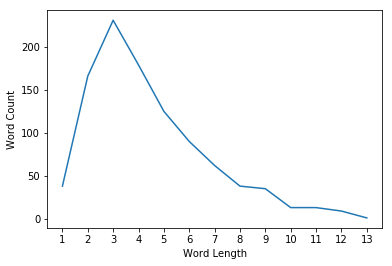

In [11]:
import nltk, matplotlib.pyplot as plt
%matplotlib inline

plt.plot([f[0] for f in orderedLengthFreqs], [f[1] for f in orderedLengthFreqs])
plt.xticks(range(1,len(orderedLengthFreqs)+1))
plt.xlabel('Word Length')
plt.ylabel('Word Count')
plt.show()

Let's compare that to Mendenhall's graph – not bad!

![Mendhall Characteristic Curve](data/Mendenhall-CharacteristicCurve/OliverTwist-CharacteristicCurve.png)



For the sake of convenience, we might want to create a function that combines all of these steps in one.

In [14]:
import nltk, matplotlib.pyplot as plt
%matplotlib inline

def plot_characteristic_curve(string, limit=False):
    tokens = nltk.word_tokenize(string)
    words = [token for token in tokens if any(c for c in token if c.isalpha())]
    if limit:
        words = words[:limit]
    lengths = [len(word) for word in words]
    lengthFreqs = nltk.FreqDist(lengths)
    orderedLengthFreqs = sorted(list(lengthFreqs.items()))
    plt.plot([f[0] for f in orderedLengthFreqs], [f[1] for f in orderedLengthFreqs])
    plt.xticks(range(1,len(orderedLengthFreqs)+1))
    plt.xlabel('Word Length')
    plt.ylabel('Word Count')
    plt.show()

We can try this out by plotting all of _Oliver Twist_ (something that Mendenhall probably wouldn't have wanted to do manually).

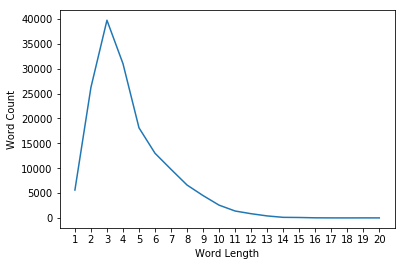

In [15]:
plot_characteristic_curve(oliverTwistString) # show all, without limiting to first 1000 words

---

This notebook is part of the [Epistemelogica](/) project by Stéfan Sinclair and Geoffrey Rockwell (CC-BY).